In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence Intervals 

In [2]:
tips = sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
tips.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


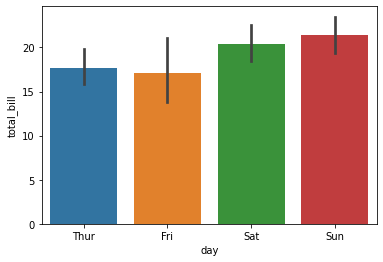

In [6]:
sns.barplot(x="day",y="total_bill",data=tips,ci=95);

In [7]:
tipsFri = tips[tips["day"]=='Fri']
tipsFri.head()

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


In [8]:
xbar = tipsFri.total_bill.mean()
xbar

17.151578947368417

In [9]:
tipsFri.total_bill.std()

8.302659723217143

In [10]:
sem = tipsFri.total_bill.sem()# sem standard error hesaplar
sem

1.904760773479416

In [11]:
moe = 1.96 * sem
moe

3.7333311160196554

In [12]:
upper = xbar + moe
upper

20.884910063388073

In [13]:
lower = xbar - moe
lower

13.418247831348761

In [14]:
stats.norm.interval(0.95,loc=xbar,scale=sem)

(13.418316432184106, 20.88484146255273)

In [15]:
stats.norm.interval(0.95,loc=tipsFri.total_bill.mean(),scale=tipsFri.total_bill.sem())

(13.418316432184106, 20.88484146255273)

In [16]:
stats.t.interval(0.95,df=len(tipsFri)-1,loc=tipsFri.total_bill.mean(),scale=tipsFri.total_bill.sem())

(13.149825056979093, 21.15333283775774)

In [17]:
tipsSun = tips[tips["day"]=='Sun']

In [18]:
stats.t.interval(0.95,df=len(tipsSun)-1,loc=tipsSun.total_bill.mean(),scale=tipsSun.total_bill.sem())

(19.391773706521036, 23.42822629347897)

In [19]:
stats.t.ppf(0.975,75)

1.9921021536898653

In [20]:
stats.norm.ppf(0.975)

1.959963984540054